In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import table

In [39]:
import numpy as np
import pandas as pd

In [40]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [42]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [43]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [44]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [45]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [46]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.like('2017%'))
#plt.plot(precipitation)
for row in precipitation:
    print('Date:',row.date,'precipitation:',row.prcp)
# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)



Date: 2017-01-01 precipitation: 0.0
Date: 2017-01-02 precipitation: 0.0
Date: 2017-01-03 precipitation: 0.0
Date: 2017-01-04 precipitation: 0.0
Date: 2017-01-05 precipitation: 0.0
Date: 2017-01-06 precipitation: 0.0
Date: 2017-01-07 precipitation: 0.0
Date: 2017-01-08 precipitation: 0.0
Date: 2017-01-09 precipitation: 0.0
Date: 2017-01-10 precipitation: 0.0
Date: 2017-01-11 precipitation: 0.0
Date: 2017-01-12 precipitation: 0.0
Date: 2017-01-13 precipitation: 0.0
Date: 2017-01-14 precipitation: 0.0
Date: 2017-01-15 precipitation: 0.0
Date: 2017-01-16 precipitation: 0.0
Date: 2017-01-17 precipitation: 0.0
Date: 2017-01-18 precipitation: 0.0
Date: 2017-01-19 precipitation: 0.0
Date: 2017-01-20 precipitation: 0.0
Date: 2017-01-21 precipitation: 0.0
Date: 2017-01-22 precipitation: 0.16
Date: 2017-01-23 precipitation: 0.0
Date: 2017-01-24 precipitation: 0.04
Date: 2017-01-25 precipitation: 0.03
Date: 2017-01-26 precipitation: 0.0
Date: 2017-01-27 precipitation: 0.0
Date: 2017-01-28 precipit

Date: 2017-03-14 precipitation: 0.0
Date: 2017-03-16 precipitation: None
Date: 2017-03-17 precipitation: 0.06
Date: 2017-03-18 precipitation: 0.0
Date: 2017-03-20 precipitation: None
Date: 2017-03-21 precipitation: 0.0
Date: 2017-03-22 precipitation: 0.0
Date: 2017-03-23 precipitation: 0.0
Date: 2017-03-24 precipitation: 0.15
Date: 2017-03-27 precipitation: None
Date: 2017-03-28 precipitation: 0.0
Date: 2017-03-29 precipitation: 0.03
Date: 2017-03-30 precipitation: 0.03
Date: 2017-03-31 precipitation: 0.0
Date: 2017-04-01 precipitation: 0.0
Date: 2017-04-02 precipitation: 0.0
Date: 2017-04-03 precipitation: 0.09
Date: 2017-04-04 precipitation: 0.0
Date: 2017-04-05 precipitation: 0.07
Date: 2017-04-06 precipitation: 0.0
Date: 2017-04-07 precipitation: 0.0
Date: 2017-04-09 precipitation: None
Date: 2017-04-10 precipitation: 0.0
Date: 2017-04-11 precipitation: 0.16
Date: 2017-04-12 precipitation: 0.29
Date: 2017-04-13 precipitation: 0.0
Date: 2017-04-14 precipitation: 0.29
Date: 2017-04-1

Date: 2017-07-02 precipitation: None
Date: 2017-07-03 precipitation: 0.02
Date: 2017-07-05 precipitation: None
Date: 2017-07-06 precipitation: 0.0
Date: 2017-07-07 precipitation: 0.0
Date: 2017-07-08 precipitation: 0.0
Date: 2017-07-09 precipitation: 0.0
Date: 2017-07-10 precipitation: 0.0
Date: 2017-07-11 precipitation: 0.0
Date: 2017-07-12 precipitation: 0.0
Date: 2017-07-13 precipitation: 0.11
Date: 2017-07-14 precipitation: 0.0
Date: 2017-07-15 precipitation: 0.0
Date: 2017-07-16 precipitation: 0.0
Date: 2017-07-17 precipitation: 0.0
Date: 2017-07-18 precipitation: 0.0
Date: 2017-07-19 precipitation: 0.0
Date: 2017-07-20 precipitation: 0.33
Date: 2017-07-21 precipitation: 0.0
Date: 2017-07-22 precipitation: 0.0
Date: 2017-07-24 precipitation: None
Date: 2017-07-25 precipitation: 0.05
Date: 2017-07-26 precipitation: 0.0
Date: 2017-07-27 precipitation: 0.0
Date: 2017-07-28 precipitation: 0.0
Date: 2017-07-29 precipitation: 0.0
Date: 2017-07-30 precipitation: 0.0
Date: 2017-07-31 prec

Date: 2017-08-17 precipitation: 0.01
Date: 2017-08-18 precipitation: 0.06
Date: 2017-01-01 precipitation: 0.03
Date: 2017-01-02 precipitation: 0.0
Date: 2017-01-03 precipitation: 0.0
Date: 2017-01-04 precipitation: 0.0
Date: 2017-01-05 precipitation: 0.47
Date: 2017-01-06 precipitation: 0.1
Date: 2017-01-07 precipitation: 0.0
Date: 2017-01-08 precipitation: 0.03
Date: 2017-01-09 precipitation: 0.0
Date: 2017-01-10 precipitation: 0.0
Date: 2017-01-11 precipitation: 0.0
Date: 2017-01-12 precipitation: 0.0
Date: 2017-01-13 precipitation: 0.0
Date: 2017-01-14 precipitation: 0.0
Date: 2017-01-15 precipitation: 0.01
Date: 2017-01-16 precipitation: 0.0
Date: 2017-01-17 precipitation: 0.0
Date: 2017-01-18 precipitation: 0.07
Date: 2017-01-19 precipitation: 0.0
Date: 2017-01-20 precipitation: 0.0
Date: 2017-01-21 precipitation: 0.08
Date: 2017-01-22 precipitation: 0.72
Date: 2017-01-23 precipitation: 0.85
Date: 2017-01-24 precipitation: 1.85
Date: 2017-01-25 precipitation: 2.64
Date: 2017-01-26

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

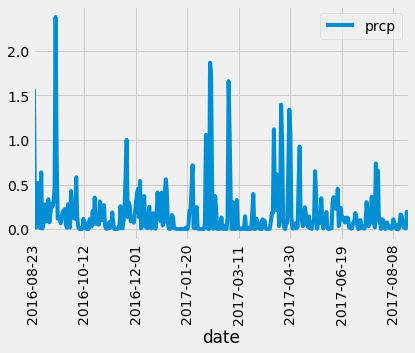

In [50]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year)
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation)
# Sort the dataframe by date

ax = precipitation_df.groupby("date").mean()
# Use Pandas Plotting with Matplotlib to plot the data
ax.plot()
plt.xticks(rotation = 90)

![precipitation](Images/precipitation.png)

In [51]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [52]:
# Design a query to show how many stations are available in this dataset?
available_stations = session.query(Station.station, Station.name)
for row in available_stations:
    print('Station:',row.station,'name:',row.name)

Station: USC00519397 name: WAIKIKI 717.2, HI US
Station: USC00513117 name: KANEOHE 838.1, HI US
Station: USC00514830 name: KUALOA RANCH HEADQUARTERS 886.9, HI US
Station: USC00517948 name: PEARL CITY, HI US
Station: USC00518838 name: UPPER WAHIAWA 874.3, HI US
Station: USC00519523 name: WAIMANALO EXPERIMENTAL FARM, HI US
Station: USC00519281 name: WAIHEE 837.5, HI US
Station: USC00511918 name: HONOLULU OBSERVATORY 702.2, HI US
Station: USC00516128 name: MANOA LYON ARBO 785.2, HI US


In [53]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
available_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
available_stations
#station_df["station"].value_counts()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

min_temp = session.query(Measurement.station, Measurement.tobs, Measurement.date)
tobs_df = pd.DataFrame(min_temp)
output_list = []
output_list.append(min(tobs_df['tobs']))
output_list.append(max(tobs_df['tobs']))
output_list.append(max(tobs_df[tobs_df['station'] == 'USC00519281'].mean()))
output_list

[53.0, 87.0, 71.66378066378067]

In [55]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.station, Measurement.tobs, Measurement.date).filter(Measurement.date.like('2017%'))
tobs_data_df = pd.DataFrame(tobs_data)
ax = tobs_data_df[tobs_data_df['station'] == 'USC00519281']
ax

,station,tobs,date
954,USC00519281,72.0,2017-01-01
955,USC00519281,70.0,2017-01-02
956,USC00519281,64.0,2017-01-03
957,USC00519281,63.0,2017-01-04
958,USC00519281,63.0,2017-01-05
959,USC00519281,62.0,2017-01-06
960,USC00519281,70.0,2017-01-07
961,USC00519281,70.0,2017-01-08
962,USC00519281,62.0,2017-01-09
963,USC00519281,62.0,2017-01-10


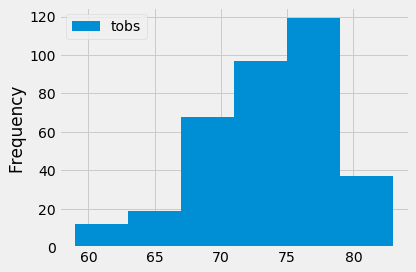

In [58]:

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= last_year).all()
results_df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=6)
plt.tight_layout()

![precipitation](Images/station-histogram.png)

In [57]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [84]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
import datetime as dt
start = dt.date(2016, 1, 1) - dt.timedelta(days=365)
end = dt.date(2016, 12, 31) - dt.timedelta(days=365)
temps =calc_temps(start.strftime("%Y-%m-%d"), end.strftime("%Y-%m-%d"))
print(temps)

[(62.0, 68.36585365853658, 74.0)]


/Users/morgancordray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


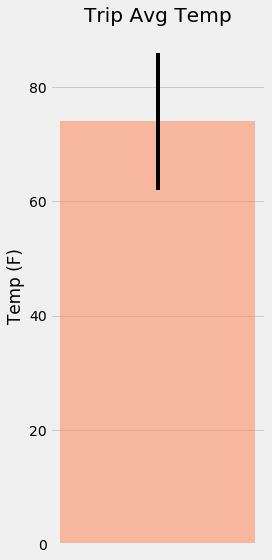

/Users/morgancordray/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


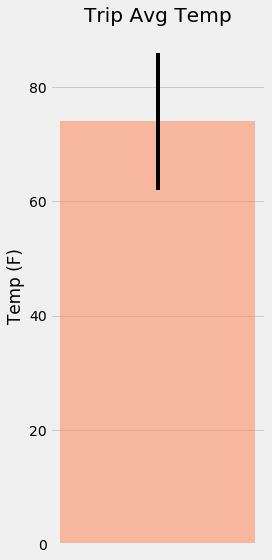

In [100]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_min = 62.0
temp_max = 74.0
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerror = temp_max - temp_min

bar = plt.bar(xpos, temp_max, yerr=yerror, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")


fig.tight_layout()
fig.show()


In [107]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start_date = '2016-01-01'
end_date = '2016-12-31'

sel = [Station.station, Station.name, Station.latitude,
      Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
station_results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date >= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(station_results)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 231.75999999999996), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 123.64000000000011), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 86.82999999999991), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 58.08999999999999), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 49.089999999999996), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 26.81000000000001), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 6.359999999999999)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


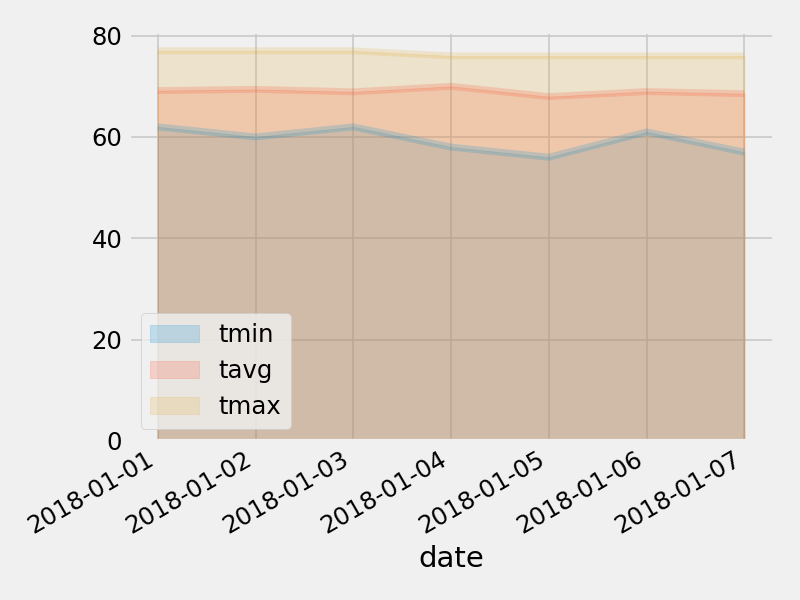

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
